/Users/reona/workspace_local/randoor/.venv/lib/python2.7/site-packages/quaternion/numba_wrapper.py:20: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


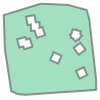

In [1]:
from randoor.generator.obstacle_room import ObstacleRoomGenerator
o_generator = ObstacleRoomGenerator()
obs_room = o_generator.generate_new()
obs_room.get_freespace_poly()

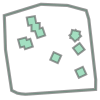

In [2]:
obs_room.get_collision_poly()

In [3]:
from randoor.spawner import geom
from randoor.spawner import poly
from shapely.geometry import Polygon
import numpy as np

p = Polygon(poly.get_square_horizon((0,0), 1, np.pi/4))
samples = geom.sample_from_faces([p, p], 1, 0.01)
samples

array([[[-0.70354666, -0.7126178 ]],

       [[ 0.28246363,  1.14055899]]])

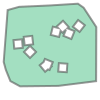

In [4]:
from randoor.generator.simple_search_room import SimpleSearchRoomGenerator
ss_generator = SimpleSearchRoomGenerator()
ss_room = ss_generator.generate_new()
ss_room.get_freespace_poly()

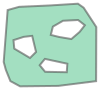

In [5]:
ss_room.get_freezone_poly()

In [6]:
ss_room.obstacle_count, ss_room.target_count

(10, 3)

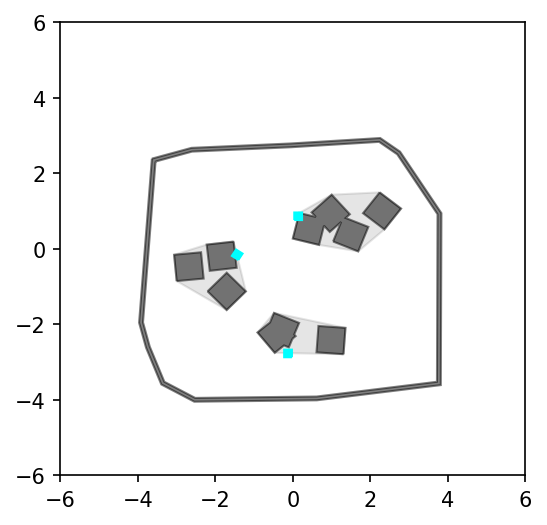

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

fig = plt.figure(1, figsize=(4,4), dpi=150)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax = fig.add_subplot(111)

wall = unary_union(ss_room.polygons[ss_room.tag_wall])
obstacles = unary_union(ss_room.polygons[ss_room.tag_obstacle])
targets = unary_union(ss_room.polygons[ss_room.tag_target])
zones = unary_union(ss_room.obstacle_hulls)

ax.add_patch(PolygonPatch(wall, color='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obstacles, color='black', alpha=0.5, zorder=2))
ax.add_patch(PolygonPatch(zones, color='black', alpha=0.1, zorder=3))
ax.add_patch(PolygonPatch(targets, color='cyan', alpha=1, zorder=4))

plt.show()